In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'


df = yf.download('AAPL', start=start, end=end,auto_adjust=False)


print(df.head())


[*********************100%***********************]  1 of 1 completed

Price      Adj Close     Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                                   
2010-01-04  6.440332  7.643214  7.660714  7.585000  7.622500  493729600
2010-01-05  6.451466  7.656429  7.699643  7.616071  7.664286  601904800
2010-01-06  6.348846  7.534643  7.686786  7.526786  7.656429  552160000
2010-01-07  6.337108  7.520714  7.571429  7.466071  7.562500  477131200
2010-01-08  6.379242  7.570714  7.571429  7.466429  7.510714  447610800


In [11]:
start = '2010-01-01'
df.columns.name = None  # Remove top-level name 'Price'
df.reset_index(inplace=True)  # Make 'Date' a normal column
print(df.head())

Price        Date Adj Close     Close      High       Low      Open     Volume
Ticker                 AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
0      2010-01-04  6.440332  7.643214  7.660714  7.585000  7.622500  493729600
1      2010-01-05  6.451466  7.656429  7.699643  7.616071  7.664286  601904800
2      2010-01-06  6.348846  7.534643  7.686786  7.526786  7.656429  552160000
3      2010-01-07  6.337108  7.520714  7.571429  7.466071  7.562500  477131200
4      2010-01-08  6.379242  7.570714  7.571429  7.466429  7.510714  447610800


In [12]:
df.tail()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
2510,2019-12-23,68.757652,71.000000,71.062500,70.092499,70.132500,98572000
2511,2019-12-24,68.823013,71.067497,71.222504,70.730003,71.172501,48478800
2512,2019-12-26,70.188492,72.477501,72.495003,71.175003,71.205002,93121200
2513,2019-12-27,70.161865,72.449997,73.492500,72.029999,72.779999,146266000
2514,2019-12-30,70.578293,72.879997,73.172501,71.305000,72.364998,144114400


In [13]:
df=df.reset_index()
df.head()

Price,index,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,0,2010-01-04,6.440332,7.643214,7.660714,7.585000,7.622500,493729600
1,1,2010-01-05,6.451466,7.656429,7.699643,7.616071,7.664286,601904800
2,2,2010-01-06,6.348846,7.534643,7.686786,7.526786,7.656429,552160000
3,3,2010-01-07,6.337108,7.520714,7.571429,7.466071,7.562500,477131200
4,4,2010-01-08,6.379242,7.570714,7.571429,7.466429,7.510714,447610800


In [ ]:
df=df.drop(['Date','Adj Close'],axis=1)


In [16]:
df.head()

Price,index,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,0,7.643214,7.660714,7.585000,7.622500,493729600
1,1,7.656429,7.699643,7.616071,7.664286,601904800
2,2,7.534643,7.686786,7.526786,7.656429,552160000
3,3,7.520714,7.571429,7.466071,7.562500,477131200
4,4,7.570714,7.571429,7.466429,7.510714,447610800


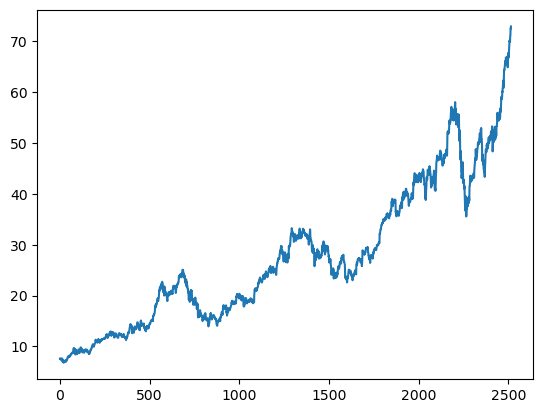

In [17]:
plt.plot(df.Close)

In [19]:
ma100 =df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,59.201075
2511,59.401700
2512,59.643125
2513,59.875125


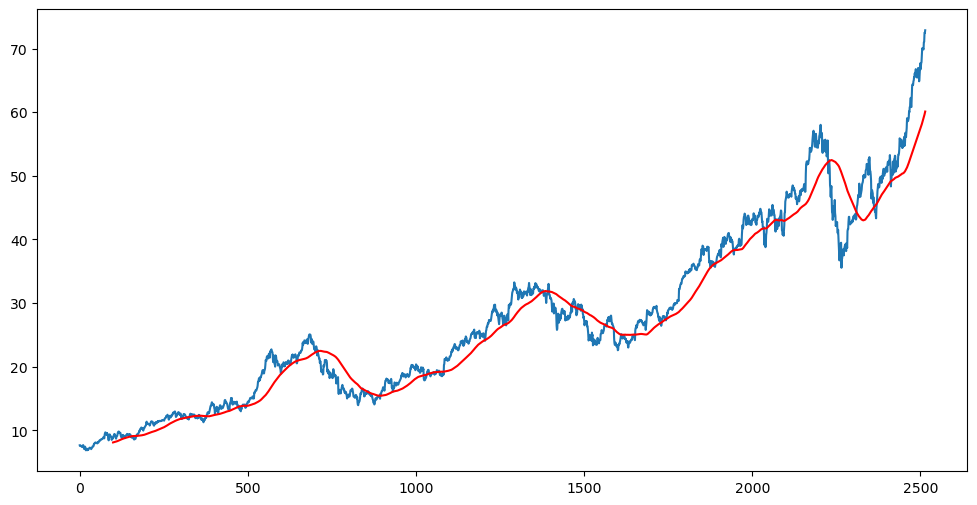

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [22]:
ma200 =df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,54.132313
2511,54.261513
2512,54.396763
2513,54.529350


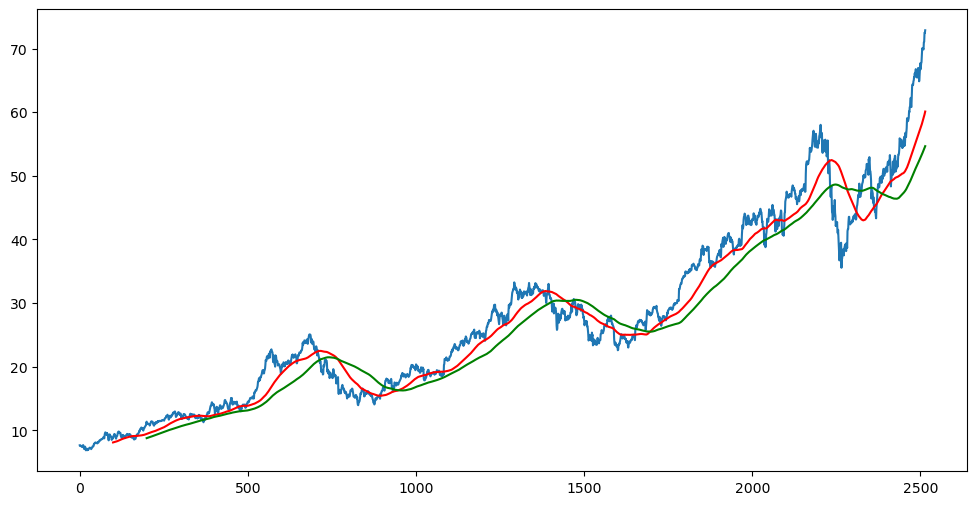

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [24]:
df.shape

(2515, 6)

In [ ]:

close_prices = df['Close']


split_index = int(len(close_prices) * 0.70)

data_training = pd.DataFrame(close_prices[:split_index])
data_testing = pd.DataFrame(close_prices[split_index:])


print("Training data shape:", data_training.shape)
print("Testing data shape:", data_testing.shape)

Training data shape: (1760, 1)
Testing data shape: (755, 1)


In [31]:
data_training.head()


Ticker,AAPL
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [32]:
data_testing.head()

Ticker,AAPL
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [34]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [36]:
data_training_array.shape

(1760, 1)

In [ ]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])



In [38]:
x_train

[array([[2.97178191e-02],
        [3.02185410e-02],
        [2.56038878e-02],
        [2.50760817e-02],
        [2.69706691e-02],
        [2.44400837e-02],
        [2.12057268e-02],
        [2.51708129e-02],
        [2.35198380e-02],
        [1.87833875e-02],
        [3.11116846e-02],
        [2.66323796e-02],
        [2.16793646e-02],
        [7.71362572e-03],
        [1.49130326e-02],
        [1.87969205e-02],
        [2.14222733e-02],
        [9.79765742e-03],
        [1.35149573e-05],
        [3.62674239e-03],
        [5.15593812e-03],
        [9.71645927e-03],
        [0.00000000e+00],
        [4.61461711e-03],
        [2.80124591e-03],
        [5.60252796e-03],
        [4.15451231e-03],
        [8.95862792e-03],
        [1.12727391e-02],
        [1.53596224e-02],
        [1.42093514e-02],
        [1.47235702e-02],
        [1.30184452e-02],
        [1.13268532e-02],
        [6.77986503e-03],
        [1.16516638e-02],
        [1.34650350e-02],
        [1.70105973e-02],
        [2.2

In [39]:
x_train,y_train =np.array(x_train),np.array(y_train)

In [41]:
x_train.shape

(1660, 100, 1)

In [40]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [42]:
model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\navee\.conda\envs\emotion_venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 221ms/step - loss: 0.1223
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - loss: 0.0125
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - loss: 0.0094
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - loss: 0.0102
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - loss: 0.0095
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - loss: 0.0091
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - loss: 0.0079
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - loss: 0.0076
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - loss: 0.0079
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 221ms/step - loss: 0.0083
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - loss: 0.0081
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - loss: 0.0079
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - loss: 0.0066
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - loss: 0.0067
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [46]:
model.save('keras_model.h5')

In [47]:
model.save('keras_model_1.keras')

In [48]:
data_testing.head()

Ticker,AAPL
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [50]:
past_100_days = data_training.tail(100)

In [52]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [53]:
final_df.head()

Ticker,AAPL
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [54]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [82]:
input_data.shape

(855, 1)

In [83]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [84]:
x_test,y_test =np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [85]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step


In [86]:
y_predicted.shape

(755, 1)

In [87]:
y_predicted

array([[0.08691242],
       [0.087515  ],
       [0.08814957],
       [0.08880371],
       [0.08946537],
       [0.09012567],
       [0.09078382],
       [0.0914472 ],
       [0.09212466],
       [0.09282687],
       [0.09355998],
       [0.09432537],
       [0.09512477],
       [0.09596279],
       [0.09683872],
       [0.09774485],
       [0.09867334],
       [0.09961553],
       [0.1005718 ],
       [0.10154434],
       [0.10253466],
       [0.10354142],
       [0.10455889],
       [0.10562238],
       [0.10678915],
       [0.10810636],
       [0.10961351],
       [0.11133566],
       [0.11327966],
       [0.11543901],
       [0.11779452],
       [0.12032213],
       [0.12300007],
       [0.12580653],
       [0.1287167 ],
       [0.13170555],
       [0.13475716],
       [0.13786665],
       [0.14101943],
       [0.14420584],
       [0.14742112],
       [0.15065287],
       [0.15386587],
       [0.15705726],
       [0.1602267 ],
       [0.16334385],
       [0.1663672 ],
       [0.169

In [88]:
scaler.scale_

array([0.02123255])

In [80]:
scale_factor =1/0.02123255
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

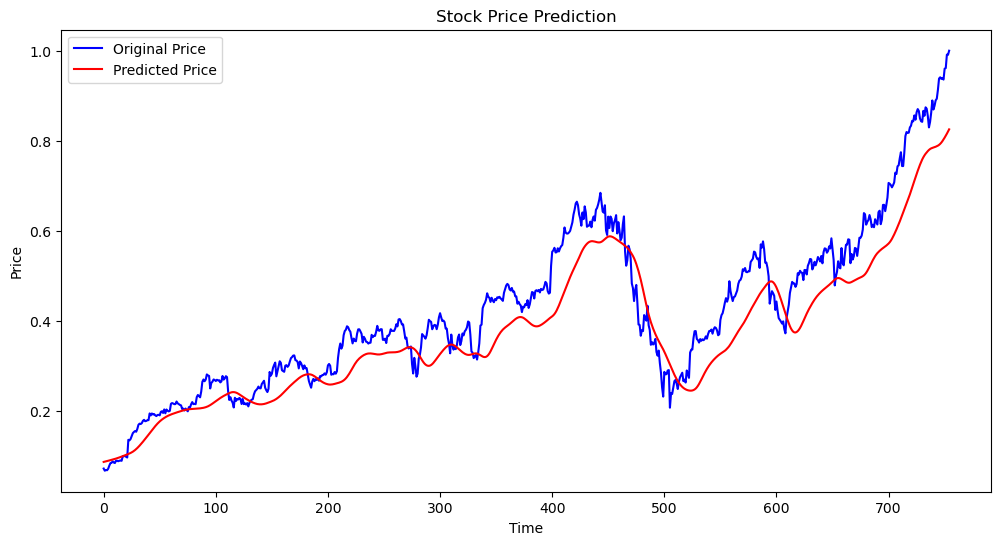

In [89]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()